<a href="https://colab.research.google.com/github/kshitizagarwal-dev/ComputerVision/blob/main/Clothing_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
type(mnist)

module

Loading the minist dataset.

In [4]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
print(training_images.shape,'\t', training_labels.shape)
print(test_images.shape,'\t', test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) 	 (60000,)
(10000, 28, 28) 	 (10000,)


In [5]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
test_images = test_images/255
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

NORMALIZING THE IMAGES.

In [7]:
training_images=training_images / 255.0
training_images.shape


(60000, 28, 28)

Viusalizing the images.

1
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.94901961 0.83921569 0.80392157 0.81176471 0.81176471 0.75294118
  0.8745098  0.7372549  0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.37254902 1.         0.9254902  0.95686275 0.94901961 0.9372549  0.88627451
  0.90980392 1.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.7254902  0.96862745 0.86666667 0.89019608 0.90196078 0.89803922 0.8745098
  0.83921569 1.         0.30196078 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0. 

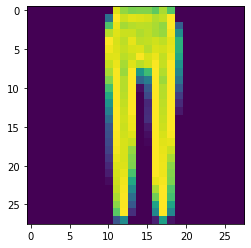

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[97])
print(training_labels[97])
print(training_images[97])


creating the model with using the callback to stop the training after reaching a required accuracy.

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy')> 0.9):
      print('\nReached the required the accuracy')
      self.model.stop_training = True


callbacks = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])
test_loss = model.evaluate(test_images, test_labels )

Epoch 1/15
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4957 - accuracy: 0.8256
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8644
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3382 - accuracy: 0.8772
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3150 - accuracy: 0.8845
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8916
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.8956
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.8991
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9046

Reached the required the accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8852


Sequential: That defines a SEQUENCE of layers in the neural network

Dense: Adds a layer of neurons

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [10]:
test_loss

[0.32680320739746094, 0.885200023651123]

Using the convolution layer and maxpooling to train our model.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0


model1= tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(training_images, training_labels, epochs=25)
test_loss1 = model1.evaluate(test_images, test_labels )


Epoch 1/25
1875/1875 [==============================] - 23s 6ms/step - loss: 0.4356 - accuracy: 0.8411
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2936 - accuracy: 0.8913
Epoch 3/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2476 - accuracy: 0.9083
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2142 - accuracy: 0.9200
Epoch 5/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1871 - accuracy: 0.9292
Epoch 6/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1643 - accuracy: 0.9384
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1448 - accuracy: 0.9455
Epoch 8/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1269 - accuracy: 0.9512
Epoch 9/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1127 - accuracy: 0.9578
Epoch 10/25
1875/1875 [==============================] - 11s 6ms/step - l

In [2]:
test_loss1

[0.5993992686271667, 0.9103999733924866]